In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
data_dir = '../kaggle_data/'

In [3]:
kaggle_train = data_dir+'train.csv'

In [4]:
df = pd.read_csv(kaggle_train)
#df_train,df_cv = train_test_split(pd.read_csv(kaggle_train))

In [5]:
#df_train.sortlevel()
df['null_count'] = df.isnull().sum(axis=1)

In [6]:
df = df[df['null_count']<10]
df.drop('null_count',axis=1,inplace=True)

In [7]:
df = df.sample(frac=0.1)
len(df.index)

6359

In [8]:
person_id = df['ID']
y_df = df['target']
y_df.index = df['ID']
category_features = ['v24','v30','v31','v47','v52','v56','v66',\
                     'v74','v75','v79','v91','v107','v110','v112','v113','v125']
complicated_category_features = ['v3','v22','v52','v71']
integer_features = ['v38','v62','v72','v129']

non_numeric = ['ID','target']+category_features+complicated_category_features
numeric_features = []
for c in df.columns:
    if c not in non_numeric:
        numeric_features.append(c)


In [9]:
# df[integer_features]

In [10]:
df_cat = df[category_features]
df_cat.index = df['ID']

In [11]:
df_cat = pd.get_dummies(df_cat,dummy_na=True)

In [12]:
# for c in df_cat.columns.values:
#     print(c)
#     print(df_cat[c].value_counts())

In [13]:
df_num = df[numeric_features]


In [14]:
for c in df_num.columns.values:
    df_num[c] = df_num[c].fillna(df_num[c].mean())
df_num.index = df['ID']

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [15]:
X_df = df_num.merge(df_cat,how='inner',left_index=True,right_index=True)


In [16]:
X_df['Target'] = y_df.values

In [17]:
df_train,df_test = train_test_split(X_df)

In [18]:
y_df_train = df_train['Target']
X_df_train = df_train.drop(['Target'],axis=1)
y_df_test = df_test['Target']
X_df_test = df_test.drop(['Target'],axis=1)


In [19]:
X_train = X_df_train.values
y_train = y_df_train.values
X_test = X_df_test.values
y_test = y_df_test.values

# X_train = X_df_train[imp_features].values
# y_train = y_df_train.values
# X_test = X_df_test[imp_features].values
# y_test = y_df_test.values

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = LogisticRegression(C=0.01)
#clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
np.shape(X_train)

(4769, 424)

TRAINING SET:


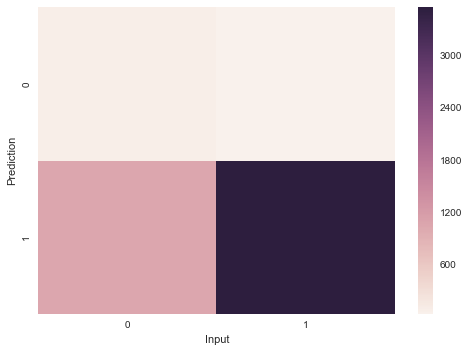

TEST SET:


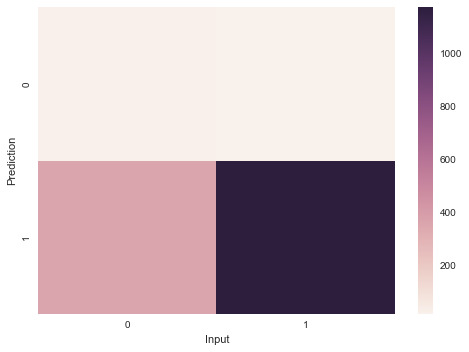

In [28]:
# Predictions on training
print("TRAINING SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_train),y_train))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()

# Predictions on test
print("TEST SET:")
import seaborn as sns
from sklearn.metrics import confusion_matrix
ax = sns.heatmap(confusion_matrix(clf.predict(X_test),y_test))
ax.set_xlabel('Input')
ax.set_ylabel('Prediction')
plt.show()

In [29]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
cols = X_df_train.columns.values
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, cols[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")

lim = -1
plt.bar(range(X_train.shape[1])[:lim], importances[indices][:lim],
       color="r", yerr=std[indices][:lim], align="center")
plt.xticks(range(X_train.shape[1])[:lim], np.array(cols)[indices[:lim]])
plt.xlim([-1, max(np.arange(X_train.shape[1])[:lim])])
plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [30]:
# imp_features = cols[importances>0.002]

(array([ 1159.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3610.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

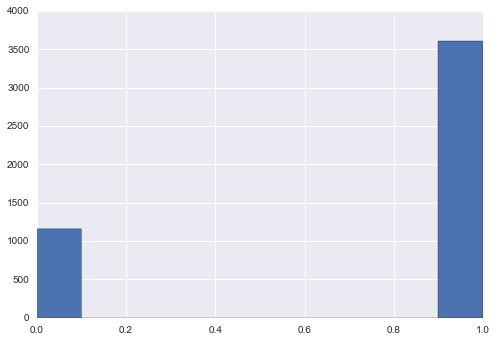

In [32]:
plt.hist(y_train)